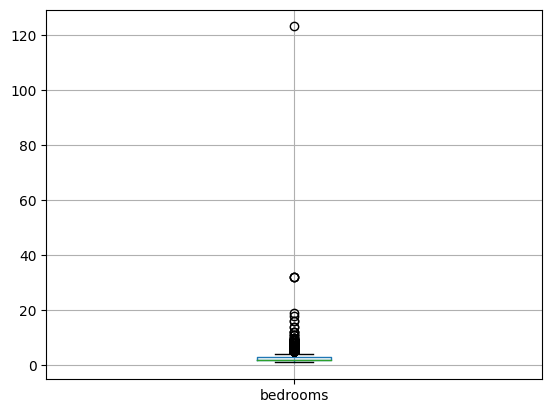

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# # importer
df =pd.read_csv("..\data\cleaned_data.csv",sep=",")
df.head()

# Create box plot for 'price' column
df.boxplot(column='price')

# Show plot
plt.show()

In [86]:
# removing bedrooms, liv_room_surf, frontages, bathrooms, id, basement,elevator
# surroundings,flood_zone,heating, showers, toilets, furnished, energy_class, heating,flood_zone
df = df.drop(columns = ["kitchen_type", "status_build","bedrooms", "liv_room_surf", "frontages", "bathrooms", "id", "basement","elevator", "surroundings","flood_zone", "heating", "showers","toilets", "furnished", "heating","flood_zone"])

#dropna living_area, price
df = df.dropna(subset=["living_area", "price"])

#replace swimming_pool None with 0
df["swimming_pool"] = df["swimming_pool"].fillna(0)


print(df.isnull().sum())
print(df)

building_type       0
building_subtype    0
price               0
living_area         0
terrace             0
garden              0
swimming_pool       0
energy_class        0
zipcode             0
municipality        0
province            0
dtype: int64
      building_type building_subtype     price  living_area  terrace  garden   
0         apartment        apartment  210000.0         50.0      0.0     0.0  \
2         apartment        apartment  235000.0         41.0      5.0     0.0   
4         apartment        apartment  235000.0         90.0      7.0     0.0   
5         apartment        apartment  219000.0         70.0      3.0     0.0   
6         apartment        apartment  223000.0        110.0      0.0     0.0   
...             ...              ...       ...          ...      ...     ...   
29764         house            house  180000.0        214.0     15.0     0.0   
29766     apartment        apartment  195000.0         60.0      3.0     0.0   
29767     apartment      

In [87]:
df.head()

,building_type,building_subtype,price,living_area,terrace,garden,swimming_pool,energy_class,zipcode,municipality,province
0,apartment,apartment,210000.0,50.0,0.0,0.0,0.0,4,1030,Schaerbeek,Brussels Capital Region
2,apartment,apartment,235000.0,41.0,5.0,0.0,0.0,4,9000,Gent,East Flanders
4,apartment,apartment,235000.0,90.0,7.0,0.0,0.0,4,1020,Laeken,Brussels Capital Region
5,apartment,apartment,219000.0,70.0,3.0,0.0,0.0,4,1140,Evere,Brussels Capital Region
6,apartment,apartment,223000.0,110.0,0.0,0.0,0.0,5,9230,Wetteren,East Flanders


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21311 entries, 0 to 29773
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   building_type     21311 non-null  object 
 1   building_subtype  21311 non-null  object 
 2   price             21311 non-null  float64
 3   living_area       21311 non-null  float64
 4   terrace           21311 non-null  float64
 5   garden            21311 non-null  float64
 6   swimming_pool     21311 non-null  float64
 7   energy_class      21311 non-null  object 
 8   zipcode           21311 non-null  int64  
 9   municipality      21311 non-null  object 
 10  province          21311 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 2.0+ MB


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# importer
df =pd.read_csv("..\data\cleaned_data.csv",sep=",")
df.head()


# Calcul du premier et du troisième quartile
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calcul de l'écart interquartile (IQR)
IQR = Q3 - Q1

# Définition des limites inférieure et supérieure
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Suppression des valeurs aberrantes
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Affichage du résultat
print(df_filtered)


             id building_type building_subtype     price  living_area   
0      10579542     apartment        apartment  210000.0         50.0  \
2      10576898     apartment        apartment  235000.0         41.0   
4      10585245     apartment        apartment  235000.0         90.0   
5      10584164     apartment        apartment  219000.0         70.0   
6      10579918     apartment        apartment  223000.0        110.0   
...         ...           ...              ...       ...          ...   
29778  10406906         house            house  190057.0          NaN   
29779  10406907         house            house  190057.0          NaN   
29780  10391112         house            house  190057.0          NaN   
29781  10406908         house            house  190057.0          NaN   
29782  10516684         house            house  200000.0          NaN   

       frontages  bedrooms  bathrooms  liv_room_surf  kitchen_type  ...   
0            2.0       1.0        1.0           

In [64]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25145 entries, 0 to 29782
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                25145 non-null  int64  
 1   building_type     25145 non-null  object 
 2   building_subtype  25145 non-null  object 
 3   price             25145 non-null  float64
 4   living_area       21277 non-null  float64
 5   frontages         17955 non-null  float64
 6   bedrooms          24147 non-null  float64
 7   bathrooms         20328 non-null  float64
 8   liv_room_surf     11046 non-null  float64
 9   kitchen_type      15237 non-null  float64
 10  showers           5500 non-null   float64
 11  toilets           18072 non-null  float64
 12  basement          8807 non-null   float64
 13  terrace           25145 non-null  float64
 14  garden            25145 non-null  float64
 15  elevator          10624 non-null  float64
 16  swimming_pool     7467 non-null   float64
 17

In [65]:
df_filtered.head()

,id,building_type,building_subtype,price,living_area,frontages,bedrooms,bathrooms,liv_room_surf,kitchen_type,...,swimming_pool,status_build,furnished,energy_class,heating,flood_zone,surroundings,zipcode,municipality,province
0,10579542,apartment,apartment,210000.0,50.0,2.0,1.0,1.0,NaN,1.0,...,0.0,3.0,NaN,4,Gas,Non flood zone,Urban,1030,Schaerbeek,Brussels Capital Region
2,10576898,apartment,apartment,235000.0,41.0,2.0,1.0,1.0,22.0,1.0,...,NaN,2.0,1.0,4,Electric,NaN,Urban,9000,Gent,East Flanders
4,10585245,apartment,apartment,235000.0,90.0,2.0,2.0,1.0,20.0,0.0,...,NaN,2.0,0.0,4,Gas,NaN,"Living area (residential, urban or rural)",1020,Laeken,Brussels Capital Region
5,10584164,apartment,apartment,219000.0,70.0,2.0,2.0,1.0,17.0,1.0,...,NaN,3.0,0.0,4,Gas,Non flood zone,Isolated,1140,Evere,Brussels Capital Region
6,10579918,apartment,apartment,223000.0,110.0,2.0,2.0,1.0,51.0,NaN,...,NaN,2.0,NaN,5,Gas,Non flood zone,NaN,9230,Wetteren,East Flanders


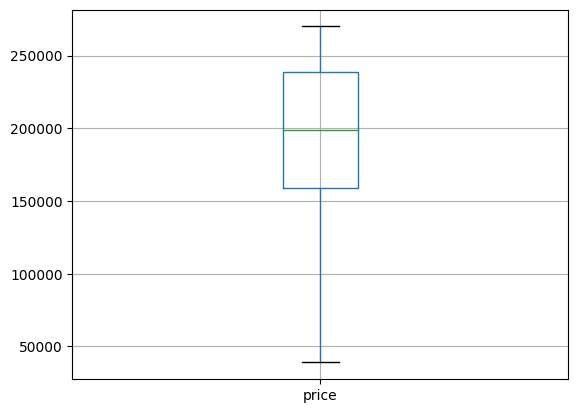

In [81]:
# Create box plot for 'price' column
df_filtered.boxplot(column='price')

# Show plot
plt.show()

In [72]:
plt.scatter(df_filtered['living_area'],df_filtered['price'])

In [75]:
from sklearn import metrics

print('R²:', metrics.r2_score(df_filtered['living_area'],df_filtered['price']))

ValueError: Input contains NaN.